# Section 1: Principal Component Analysis








In [ ]:
import numpy as np
import pandas as pd
from numpy import linalg as LA
import matplotlib.pyplot as plt

##Step 1: 아래 표를 보고 matrix을 만들세요.
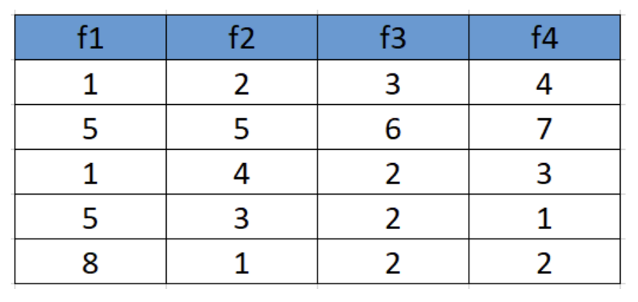


In [ ]:
# Your code here.

## Step 2: Z-score로 데이터를 표준화하여 print하세요.

In [ ]:
# your code here

## Step 3: np.cov()를 사용해서 공분산 행렬을 print하세요.

In [ ]:
# your code here

## Step 4: LA.eig()를 사용해서 eigenvalue and eigenvector를 print하세요.

In [ ]:
# your code here

## Step 5: np.matmul()를 사용해서 4개의 주성분(PCA Components)을 사용하여 주성분 공간으로 변환하세요.

In [ ]:
# your code here

## Step 6: np.linalg.inv()를 사용해서 데이터를 원복하세요.

In [ ]:
# your code here

## K를 다르게 해서 결과를 확인해보자!


In [ ]:
# tranform dataset to principal component space
err = []
pc=[]
for k in range(1, 5):
  B = v[:, :k]
  B2 = np.matmul(np.transpose(B), B)  ## this is needed to ensure B is square matrix for computation
  B3 = np.matmul(B2, np.transpose(B)) ## this is needed to ensure B is square matrix for computation
  transform_mat = np.matmul(df_std.to_numpy(), np.transpose(B3))
  print(f"transform_matrix with {k} principal components")
  print(transform_mat)
  print('------------------------------------------------\n')


  # transform back to original space
  ori_std_mat = np.matmul(transform_mat, B3)
  ori_std_mat_df = pd.DataFrame(ori_std_mat, columns=['f1', 'f2', 'f3','f4'])
  ori_mat = ori_std_mat_df.multiply(df.std()) + df.mean()
  print(ori_mat)
  print('------------------------------------------------\n')

  # compute the error between df and the matrix converted back after PCA
  err.append(np.sum(np.sum(abs(ori_mat - df))))
  pc.append(k)


plt.plot(pc, err, '.-')
plt.xlabel('k-principal component')
plt.ylabel('error')


In [ ]:
#@title Q1: We observed that as k-principal component used increases, error decreases. What does this mean?

Answer = "Choose your answer" #@param ["Choose your answer", "Less information is lost if less principal components is used for transformation", "Less information is lost if more principal components is used for for transformation" ]

## Section 2 : 더미 데이터로 확인해보자!

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

In [ ]:
# generate the coordinate pairs
points, cluster_indexes = make_blobs(n_samples=300, centers=4, cluster_std=0.8, random_state=0)

x = points[:, 0]
y = points[:, 1]

plt.scatter(x, y, s=50, alpha=0.7)

### K가 다를때 어떻게 해석할 수 있는지 확인해보자!

In [ ]:
for k in range(1,11):
  kmeans = KMeans(n_clusters=k, random_state=0)
  kmeans.fit(points)
  predicted_cluster_indexes = kmeans.predict(points)

  plt.figure()
  plt.title(f'%d cluster' % (k))
  plt.scatter(x, y, c=predicted_cluster_indexes, s=50, alpha=0.7, cmap='viridis')

  centers = kmeans.cluster_centers_
  plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100)


# Choose the best K - elbow method

Text(0, 0.5, 'Inertia')

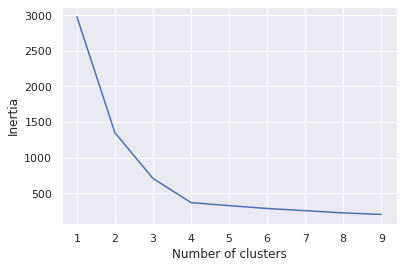

In [ ]:
inertias = []

for i in range(1, 10):
  kmeans = KMeans(n_clusters=i, random_state=0)
  kmeans.fit(points)
  inertias.append(kmeans.inertia_)

plt.plot(range(1, 10), inertias)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [ ]:
#@title Q2: Which k is the best based on elbow method?
Answer = "Choose your answer" #@param ["Choose your answer", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

In [ ]:
#@title Q3: Why?
Answer = "Type your answer here" #@param {type :'string'}

# Section 3: Faces recognition example using SVMs



In [ ]:
# import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC

In [ ]:
# Download the data and load it in as a set of numpy arrays
# min_faces_per_person limits the dataset to have the image with at least that amount
lfw_people = fetch_lfw_people(min_faces_per_person=60, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the ID of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print ("Total dataset size:")
print ("n_samples: %d" % n_samples)
print ("n_features: %d" % n_features)
print ("n_classes: %d" % n_classes)

In [ ]:
## Look at the data
visualize_face = np.random.randint(0, n_samples)

# Plotting the grey image of the above index
plt.figure(figsize=(3.6, 4.8))
plt.imshow(X[visualize_face].reshape((h, w)), cmap=plt.cm.gray)
plt.xticks(())
plt.yticks(())

In [ ]:
# split into a training (80%) and testing (20%) set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Apply PCA to X features, we can change the n_components later
n_components = 150

print("Extracting the top %d eigenfaces from %d faces" % (n_components, X_train.shape[0]))

pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(X_train)

# reconstructing the images from pca output --> eigenfaces
eigenfaces = pca.components_.reshape((n_components, h, w))

# Applying pca to training and test set
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

Extracting the top 150 eigenfaces from 1078 faces


In [ ]:
rint("Fitting the classifier to the training set")

# Hyperparameter Tuning
## parameters C and gamma for SVM, see lecture 10 for more explanation
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5], 'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }

# Creating SVM classifier with GridSearch
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid, cv=5, n_jobs=3)

# Training our classfier
clf = clf.fit(X_train_pca, y_train)

print("Best estimator found by grid search: \n{}".format(clf.best_estimator_))


Fitting the classifier to the training set
Best estimator found by grid search: 
SVC(C=1000.0, class_weight='balanced', gamma=0.005)


In [ ]:
# Evaluation of the model quality on the test set
print("Predicting people's names on the test set\n")
# Predictin for the test set
y_pred = clf.predict(X_test_pca)

# Prediction results
print(classification_report(y_test, y_pred, target_names=target_names))

Predicting people's names on the test set

                   precision    recall  f1-score   support

     Ariel Sharon       0.67      0.50      0.57        12
     Colin Powell       0.88      0.84      0.86        51
  Donald Rumsfeld       0.91      0.80      0.85        25
    George W Bush       0.79      0.97      0.87        98
Gerhard Schroeder       1.00      0.76      0.86        21
      Hugo Chavez       1.00      0.67      0.80        15
Junichiro Koizumi       1.00      0.70      0.82        10
       Tony Blair       0.92      0.89      0.91        38

         accuracy                           0.86       270
        macro avg       0.90      0.77      0.82       270
     weighted avg       0.87      0.86      0.85       270



## 결과를 확인해보자!


In [ ]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=5):
    """Helper function to plot a gallery of portraits

       inputs:
          images (numpy array) : array of images that we want to show
          titles (string array) :
          h (int) : height of the image
          w (int) : width of the image
          n_row (int) :
          n_col (int) :
    """
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())


def title(y_pred, y_test, target_names, i):
    """Helper function to generate the title
    inputs:
      y_pred : List of predictions
      y_test :

    outputs:
    """
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)


In [ ]:
# Generate titles with predicted and true labels for the images
prediction_titles = [title(y_pred, y_test, target_names, i) for i in range(y_pred.shape[0])]
# Call the plot function with necessary parameters
plot_gallery(X_test, prediction_titles, h, w)

plt.show()

In [ ]:
# plot the gallery of the most significative eigenfaces
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]

plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()

In [ ]:
#@title Q4: Which PCA components give the best results?
Answer = "Choose your answer" #@param ["Choose your answer", "n_components = 50", "n_components = 100", "n_components = 150"]

In [ ]:
#@title Q5: Why?
Answer = "Type your answer here" #@param {type :'string'}